<a href="https://www.kaggle.com/code/ciscoyslas/mlprojectbaselinemodel?scriptVersionId=152456779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

This notebook builds a baseline model for ABV (Alcohol By Volume) prediction from a beers.csv dataset.  The model uses a Random forest Regression Model to make these predictions.

_First we will add imports for the packages that we are using for this baseline model._


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/craft-cans/breweries.csv
/kaggle/input/craft-cans/beers.csv


_The next 4 cells set up the dataset to be used in our model._

In [2]:
#Load the dataset
beers_df = pd.read_csv('/kaggle/input/craft-cans/beers.csv')


In [3]:
#Selecting features (X) and target variable (y)
X = beers_df[['ibu', 'id', 'brewery_id', 'ounces']]
y = beers_df['abv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#Drop columns with missing values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]

In [5]:
#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

_Creating the model and printing our Mean Squared Error._

In [6]:
#Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.647766598639454e-05


_These next cells show the relationship between predictions and true values._

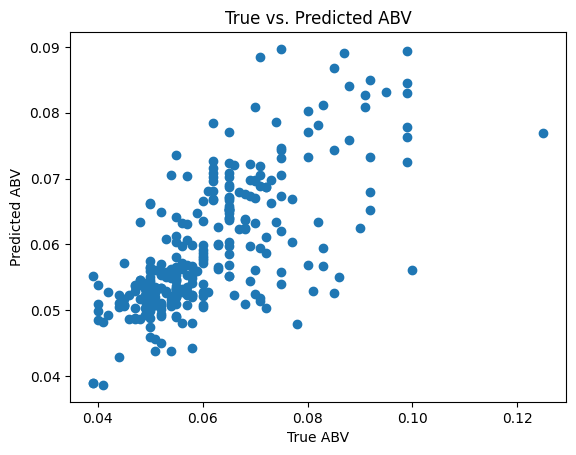

In [7]:
#Scatter plot of predicted vs. true values
plt.scatter(y_test, y_pred)
plt.xlabel('True ABV')
plt.ylabel('Predicted ABV')
plt.title('True vs. Predicted ABV')
plt.show()

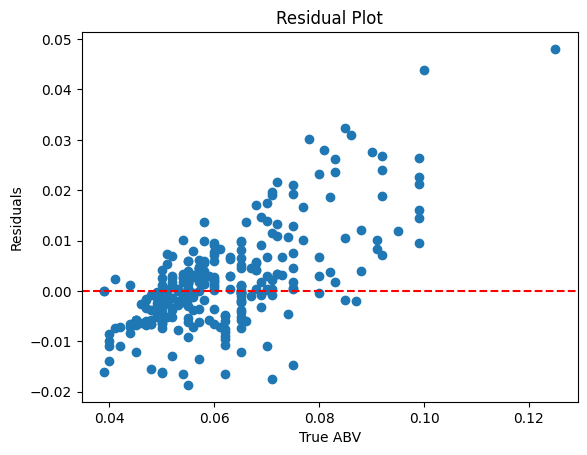

In [8]:
#Residual plot
residuals = y_test- y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True ABV')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

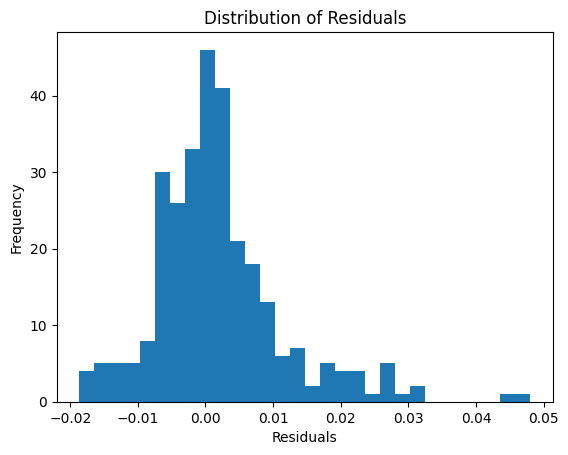

In [9]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

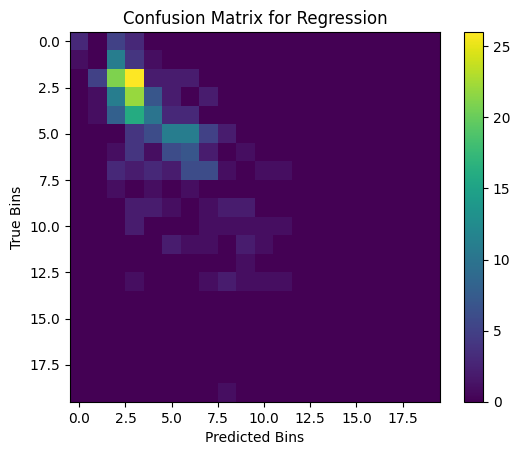

In [10]:
#Binning true and predicted values to create categories
bins = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 20)
true_bins = np.digitize(y_test, bins)
pred_bins = np.digitize(y_pred, bins)

#Count the occurrences in each bin to create a confusion matrix
confusion_matrix = np.zeros((len(bins), len(bins)))

for i in range(len(bins)):
    for j in range(len(bins)):
        confusion_matrix[i, j] = np.sum((true_bins == i + 1) & (pred_bins == j + 1))

#Plot the confusion matrix as a heatmap
plt.imshow(confusion_matrix, cmap='viridis', interpolation='nearest')
plt.title('Confusion Matrix for Regression')
plt.xlabel('Predicted Bins')
plt.ylabel('True Bins')
plt.colorbar()

plt.show()

_Next we will use a for loop to try some different estimators and random states to help tune our model.  This will help to make decisions on what values give the best kind of baseline model we can create._

In [11]:
estimators_range = [10, 25, 50, 100]
random_states_range = [42, 65, 96, 123]

#Initialize variables to store the best hyperparameters and performance
best_estimators = None
best_random_state = None
best_mse = float('inf') 

for estimators in estimators_range:
    for random_state in random_states_range:
        #Create and fit the Random Forest Regressor model
        rf_model = RandomForestRegressor(n_estimators=estimators, random_state=random_state)
        rf_model.fit(X_train, y_train)
        
        #Make predictions on the test set
        y_pred = rf_model.predict(X_test)
        
        #Evaluate the model using Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        
        #Check if the current combination of hyperparameters is the best
        if mse < best_mse:
            best_mse = mse
            best_estimators = estimators
            best_random_state = random_state

#Print the best hyperparameters and performance
print(f"Best Number of Estimators: {best_estimators}")
print(f"Best Random State: {best_random_state}")
print(f"Best Mean Squared Error: {best_mse:.4f}")

Best Number of Estimators: 100
Best Random State: 96
Best Mean Squared Error: 0.0001


_Lastly, we're making the same graphs to show the difference that just one iterative pass of tuning can make.  In the Scatter plot, Residual plot, and Histogram it is easy to see the improvement._

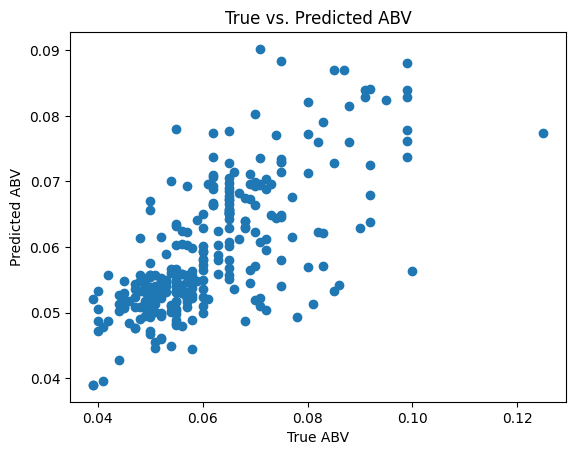

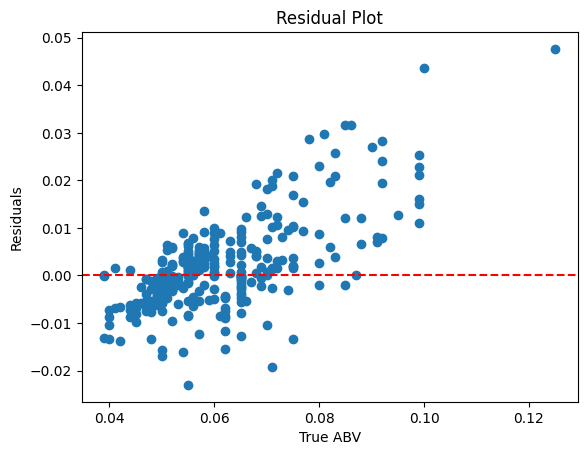

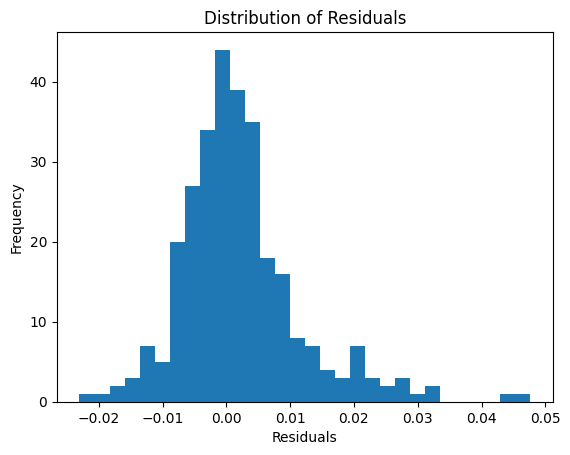

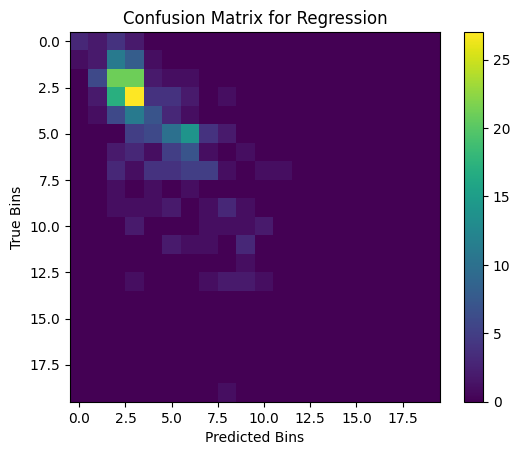

In [12]:
#Scatter plot of predicted vs. true values
plt.scatter(y_test, y_pred)
plt.xlabel('True ABV')
plt.ylabel('Predicted ABV')
plt.title('True vs. Predicted ABV')
plt.show()

#Residual plot
residuals = y_test- y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True ABV')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

#Binning true and predicted values to create categories
bins = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 20)
true_bins = np.digitize(y_test, bins)
pred_bins = np.digitize(y_pred, bins)

#Count the occurrences in each bin to create a confusion matrix
confusion_matrix = np.zeros((len(bins), len(bins)))

for i in range(len(bins)):
    for j in range(len(bins)):
        confusion_matrix[i, j] = np.sum((true_bins == i + 1) & (pred_bins == j + 1))

#Plot the confusion matrix as a heatmap
plt.imshow(confusion_matrix, cmap='viridis', interpolation='nearest')
plt.title('Confusion Matrix for Regression')
plt.xlabel('Predicted Bins')
plt.ylabel('True Bins')
plt.colorbar()

plt.show()